### 开源库folium制图基础
1.底图设定   
2.添加标记Maker


In [1]:
import folium
import base64
import cv2


##### 底图显示，folium底图包括（网络原因，有时打不开）：'OpenStreetMap' (默认)，'Stamen Terrain'，'Stamen Watercolor'等。

In [2]:
map  = folium.Map(location=[28.83, 102.84])
map



##### 设置高德、百度、天地图等为底图
高德地图(中英文版): 'https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}'.
高德卫星地图：'https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}'
GeoQ智图中国行政边界图：'http://thematic.geoq.cn/arcgis/rest/services/ThematicMaps/administrative_division_boundaryandlabel/MapServer/tile/{z}/{y}/{x}',
GeoQ智图水系图：'http://thematic.geoq.cn/arcgis/rest/services/ThematicMaps/WorldHydroMap/MapServer/tile/{z}/{y}/{x}'


In [3]:
map = folium.Map(location=[24.83, 102.84],
                tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
                 attr='高德地图（中英文版）',
                 zoom_start=12
                 )
map



##### 添加标签
云南大学：（24.827， 102.850）   
云南师范大学：（24.861， 102.854）   
春城公园：（24.877,102.830）   
洛龙公园：（24.889,102.819）    


In [10]:
##### 
map = folium.Map(location=[24.83, 102.84],
                tiles='https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}',
                 attr='高德卫星地图',
                 zoom_start=12
                 )

folium.Marker(location=[24.827, 102.850], tooltip='大学', popup='云南大学').add_to(map)
folium.Marker(location=[24.861, 102.854], tooltip='大学', popup='云南师范大学').add_to(map)
folium.Marker(location=[24.877, 102.830], tooltip='公园', popup='春城大学', icon=folium.Icon(color='green')).add_to(map)
folium.Marker(location=[24.889, 102.819], tooltip='公园', popup='洛龙大学', icon=folium.Icon(color='green')).add_to(map)

map



#### 自定义弹窗信息（图像，文字等）

750 500



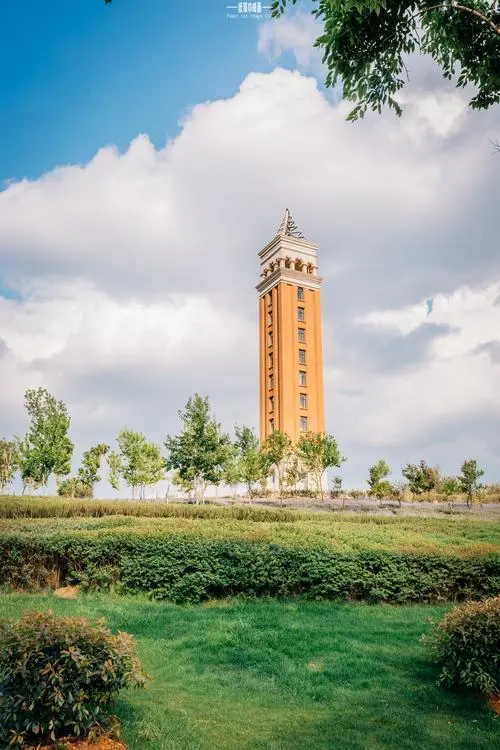

In [13]:
map_2 = folium.Map(location=[24.83, 102.84],
                tiles='https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}',
                 attr='高德卫星地图',
                 zoom_start=12
                 )
path_picture = 'data/Section-6/ynu.jpg'
height, width = cv2.imread(path_picture).shape[:2]
print(height, width)
encoded = base64.b64encode(open(path_picture, 'rb').read())
# html = '<img src="data:image; base64, {}">'.format(encoded.decode('UTF-8'))
html = '<p>这是云南大学的标志性建筑: 鼓楼</p> <br> <img src="data:image; base64, {}">'.format(encoded.decode('UTF-8'))
iframe = folium.IFrame(html=html, width=width, height=height)
popup_picture = folium.Popup(iframe)
icon_picture = folium.features.CustomIcon(icon_image=path_picture, icon_size=(40, 40))
folium.Marker(location=[24.827, 102.850], tooltip='云南大学', popup=popup_picture, icon=icon_picture).add_to(map_2)
map_2



#### 添加图形（线：polyline）

In [14]:
coords_polyline = [(24.827, 102.850), (24.889, 102.819)]



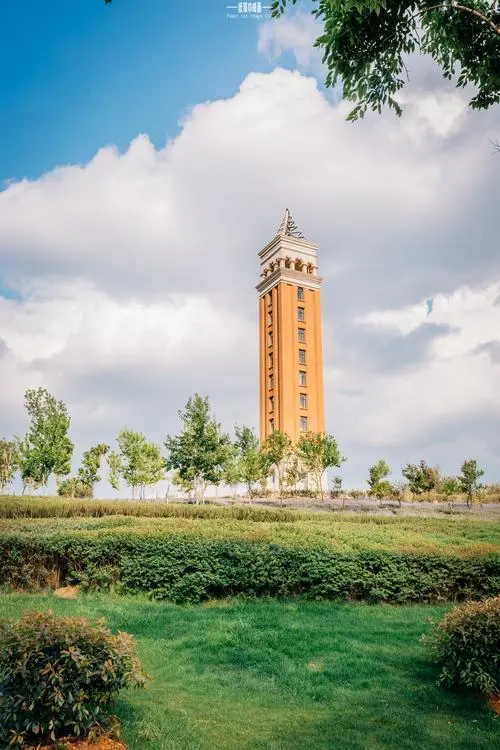

In [15]:
folium.PolyLine(coords_polyline, tooltip='云南大学—春城公园', color='red').add_to(map_2)
map_2



#### 将在线地图保存为HTML文件

In [16]:
map_2.save('data/Section-6/index.html')








### **gis数据线上地图可视化**

In [18]:
import folium
import pandas
import geopandas as gpd


In [20]:
path_kunming_vec = 'data/Section-6/kunming_districts.geojson'


In [21]:
kunming_vec_gpd = gpd.read_file(path_kunming_vec)
kunming_vec_gpd


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,cn_adcode,area(km2),geometry
0,530102,wuhua,530100,kunming,530000,100000,377.995979,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,530103,panlong,530100,kunming,530000,100000,864.295297,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,guandu,530100,kunming,530000,100000,638.333617,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,xishan,530100,kunming,530000,100000,897.396732,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,dongchuan,530100,kunming,530000,100000,1866.117588,"MULTIPOLYGON (((102.80340 26.30291, 102.80537 ..."
5,530114,chenggong,530100,kunming,530000,100000,499.363964,"MULTIPOLYGON (((102.85321 24.69792, 102.85168 ..."
6,530115,jinning,530100,kunming,530000,100000,1338.564497,"MULTIPOLYGON (((102.73979 24.81731, 102.74137 ..."
7,530124,fumin,530100,kunming,530000,100000,994.675119,"MULTIPOLYGON (((102.63768 25.36767, 102.64085 ..."
8,530125,yiliang,530100,kunming,530000,100000,1914.092175,"MULTIPOLYGON (((103.27379 25.25786, 103.27332 ..."
9,530126,shilin,530100,kunming,530000,100000,1681.342856,"MULTIPOLYGON (((103.66655 24.72420, 103.66542 ..."


In [29]:
map = folium.Map(location=[24.83, 102.84], 
           tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
           attr='高德地图-中英文版',
           zoom_start=8)
folium.GeoJson(data=path_kunming_vec, tooltip=folium.GeoJsonTooltip(fields=['dt_name'])).add_to(map)


map






地图的分级着色, folium.Choropleth()
1. 面积赋色

In [35]:
map = folium.Map(location=[24.83, 102.84], 
           tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
           attr='高德地图-中英文版',
           zoom_start=8)

folium.Choropleth(geo_data=path_kunming_vec,
                  data=kunming_vec_gpd,
                  columns = ['dt_name', 'area(km2)'],
                  key_on = 'feature.properties.dt_name',                 
                  fill_color='YlGn',
                  legend_name='面积',
                  fill_opacity=1,
                  ).add_to(map)
map








2. 人口可视化 （五华114万，盘龙98万，官渡160万，西山96万，东川26万, 呈贡64万，晋宁34万，富民14, 宜良38万，石林24，嵩明41万，禄劝37万, 寻甸46万，安宁48）


In [36]:
population_dict = {'dt_name': ['wuhua', 'panlong', 'guandu', 'xishan', 'dongchuan', 'chenggong', 'jinning', 'fumin', 'yiliang', 'shilin', 'songming', 'luquan', 'xundian', 'anning'],
                   'population': [114,  98, 160, 26, 26, 64, 34, 14, 38, 24, 41, 37, 46, 48]
}
population_pd = pandas.DataFrame.from_dict(population_dict)
population_pd


,dt_name,population
0,wuhua,114
1,panlong,98
2,guandu,160
3,xishan,26
4,dongchuan,26
5,chenggong,64
6,jinning,34
7,fumin,14
8,yiliang,38
9,shilin,24


In [37]:
map = folium.Map(location=[24.83, 102.84], 
           tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
           attr='高德地图-中英文版',
           zoom_start=8)

folium.Choropleth(geo_data=path_kunming_vec,
                  data=population_pd,
                  columns = ['dt_name', 'population'],
                  key_on = 'feature.properties.dt_name',                 
                  fill_color='YlGn',
                  legend_name='人口',
                  fill_opacity=1,
                  ).add_to(map)
map


#### 章节作业
利用python开源库制作云南大学地标区域（如图书馆、玫瑰园等）线上地图。要求标注云大呈贡校区范围，地标区域不得少于5处，线上地图简洁规范、包含信息充分，用户操作体验良好。